## Author- Clayton Bracken 
 Data Science and Buisness Analytics Intern
 
 The sparks foundation GRIP internship
 
 Task 1- Prediction using supervised machine learning.
 
 In this regression task I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


## Percentage of an student based on the number of study hours.

In [31]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
# Reading dataset from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
# Exploring the dataset

data.shape


(25, 2)

In [34]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [35]:
# Checking the data for any null values and cleaning it, if null values are found.

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Next, let us plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

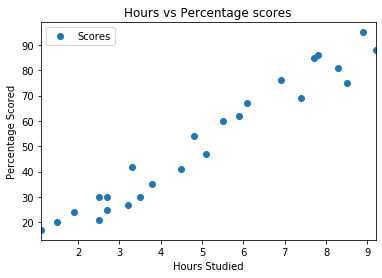

In [36]:
# Plotting the distribution of scores
data.plot(x='Hours',y='Scores', style='o')
plt.title("Hours vs Percentage scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()


From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**



Next we divide the data into "attributes"(inputs) and "lables"(outputs)


In [37]:
#Preparing the data
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [38]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [39]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete.")

Training complete.


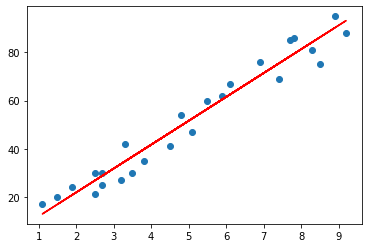

In [40]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color='red');
plt.show()

Now that we have trained our algorithm, it's time to make some predictions.

**Making the predictions**

In [41]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/ day?

In [43]:
hours = 9.25
test= np.array([hours])
test= test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


**Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [44]:
from sklearn import metrics  
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 Score :', metrics.r2_score(y_test, y_pred))

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.5987693072174
Root Mean Squared Error : 4.6474476121003665
R-2 Score : 0.9454906892105356


**Conclusion - I successfully completed the task on prediction using supervised ML,and could predict the scores of the student based on the hours studied.**